# Part 1: Logistic Regression

In [165]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [166]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [167]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [168]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
# Implement Logistic Regression algorithm

# TODO: Implement the sigmoid function. Refer to the formula in the homework4.docx file
def sigmoid(z):
    # make sure to use the z variable in the formula
    formula = 1/(1+np.exp(-z))

    return formula

def logistic_regression(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    # we need to update the weights and bias using gradient descent. Complete the code below
    for _ in range(num_iterations):
        # TODO: combine the inputs and weights together, and then add bias. Assign this value to z
        z = X @ weights + bias

        # TODO: need to output probabilities betwen 0 and 1 (HINT: use the sigmoid function)
        y_predicted = sigmoid(z)

        # Compute the gradients

        # TODO: dw is the gradient of the loss function w.r.t. the weights
        dw = (1/n_samples) * np.dot(X.T, (y_predicted - y),)

        # TODO: db is the gradient of the loss function w.r.t. the bias
        db = (1/n_samples )* np.sum(y_predicted - y)

        # TODO: update the weights and bias using the computed gradients (HINT: use the learning rate)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [170]:
# Train Logistic Regression model
# TODO: Find good values for learning_rate and num_iterations
learning_rate = 0.001
num_iterations = 500
weights, bias = logistic_regression(X_train_scaled, y_train, learning_rate, num_iterations)

# Predict class labels using trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_predicted = sigmoid(z)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [171]:
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)
print("Scaled model weights:")
print(weights)

Precision: 0.96
Recall: 0.935064935064935
F1 Score: 0.9473684210526315
Accuracy: 0.9298245614035088
Scaled model weights:
[-0.10336673 -0.0616616  -0.10435785 -0.09835698 -0.05096036 -0.07649799
 -0.09361105 -0.10597115 -0.04062841  0.01196044 -0.0761705   0.00390625
 -0.07280238 -0.07147964  0.00963252 -0.02658107 -0.02535813 -0.04910428
  0.00620761  0.00319119 -0.11110508 -0.0698384  -0.11072571 -0.10260006
 -0.0664106  -0.07814971 -0.09254581 -0.11117403 -0.06124389 -0.04225498]


# Part 2: Perceptron

Ensure that PyTorch is installed before this section, as we will utilize this powerful library. For installation, check this link - [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

In [172]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [173]:
# TODO: Concatenate 1's to the X_train_scaled and X_test_scaled from above
# Hint: You'll probably want to use the numpy concatenate operation
X_train_wones = np.concatenate([X_train_scaled, np.ones((X_train_scaled.shape[0], 1))], axis=1)
X_test_wones = np.concatenate([X_test_scaled, np.ones((X_test_scaled.shape[0],1))],axis =1)

In [174]:
# TODO: Define the Perceptron class including an __init__ function and a forward function
class Perceptron():
    # TODO: initialze the weight vector w
    def __init__(self, input_size):
        self.w = np.zeros(input_size)

    # TODO: classify a single example x using sgn(𝐰^T x + b)
    # Hint: make sure the output labels are correct
    def forward(self, x):
        return 1 if np.dot(self.w, x) >= 0 else -1

    # Implement the perceptron learning algorithm from slides
    def update(self, x, y, learning_rate):
        if y == 1:
            y = 1
        else:
            y = -1

        predict = self.forward(x)
        if predict != y:
            self.w += learning_rate * y * x


In [175]:
# Train the model
# TODO: Find good values for learning_rate and num_iterations
learning_rate = 0.01
num_iterations = 85
input_size = X_train_wones.shape[1] # Note this is the input size with the 1's trick
perceptron = Perceptron(input_size)
for _ in range(num_iterations):
  for x_i, y_i in zip(X_train_wones, y_train):
    perceptron.update(x_i, y_i, learning_rate)

In [176]:
# Evaluate the model
# Should get around 95% accuracy
correct_count = 0
for x_i, y_i in zip(X_test_wones, y_test):
    if y_i == 1:
        y_i = 1
    else:
        y_i = -1

    pred = perceptron.forward(x_i)
    correct = (pred == y_i)
    if correct:
        correct_count += 1
accuracy = float(correct_count) / len(y_test)
print("Test accuracy: %f" % accuracy)

Test accuracy: 0.956140


# Part 3: Data Preperation

In [177]:
# First, make sure the values of X_train, X_test, y_train, y_test are set correctly from Assignment 1 and not overwritten
# If necessary, go back and rerun the original cell to make sure you have those correct values
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.849e+01 1.752e+01 1.213e+02 ... 1.663e-01 2.510e-01 9.445e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 [1.760e+01 2.333e+01 1.190e+02 ... 1.996e-01 2.301e-01 1.224e-01]
 ...
 [1.222e+01 2.004e+01 7.947e+01 ... 8.088e-02 2.709e-01 8.839e-02]
 [1.944e+01 1.882e+01 1.281e+02 ... 2.060e-01 3.266e-01 9.009e-02]
 [1.492e+01 1.493e+01 9.645e+01 ... 1.147e-01 2.688e-01 8.273e-02]]
[[1.254e+01 1.807e+01 7.942e+01 ... 1.635e-02 2.233e-01 5.521e-02]
 [1.955e+01 2.877e+01 1.336e+02 ... 1.941e-01 2.818e-01 1.005e-01]
 [1.863e+01 2.511e+01 1.248e+02 ... 1.848e-01 3.444e-01 9.782e-02]
 ...
 [1.481e+01 1.470e+01 9.466e+01 ... 7.955e-02 2.334e-01 6.142e-02]
 [1.359e+01 1.784e+01 8.624e+01 ... 5.185e-02 2.335e-01 6.263e-02]
 [1.136e+01 1.757e+01 7.249e+01 ... 8.698e-02 2.973e-01 7.745e-02]]
[0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1

In [178]:
# TODO: Rewrite the logistic regression code to include test evals at every n iterations
# Should now return test accuracy every n iterations
def logistic_regression_with_eval(X, y, X_test, y_test, learning_rate, num_iterations, eval_every=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    train_acc_all = []
    test_acc_all = []

    # Fill in with old solution
    for i in range(num_iterations):
        # Add your code from above
        z = X @ weights + bias
        y_predicted = sigmoid(z)
        dw = (1/n_samples) * np.dot(X.T, y_predicted - y)
        db = (1/n_samples) * np.sum(y_predicted - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Add new code here
        if i % eval_every == 0:
          train_pred = sigmoid(X @ weights + bias)
          train_label = (train_pred >= 0.5).astype(int)
          train_acc = accuracy_score(y, train_label)

          test_pred = sigmoid(X_test @ weights + bias)
          test_label = (test_pred >= 0.5).astype(int)
          test_acc = accuracy_score(y_test, test_label)

          train_acc_all.append(train_acc)
          test_acc_all.append(test_acc)

    return weights, bias, train_acc_all, test_acc_all

In [179]:
import matplotlib.pyplot as plt

In [180]:
# Take your solution from above and plot the train and test curves
# TODO: Copy hyperparamers from your solution above
learning_rate = 0.001
num_iterations = 500
weights_scaled, bias_scaled, train_acc_scaled, test_acc_scaled = logistic_regression_with_eval(
    X_train_scaled, y_train, X_test_scaled, y_test, learning_rate, num_iterations, eval_every=1)

# Make sure you get the same values as before
y_pred = predict(X_test_scaled, weights, bias)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Precision: 0.96
Recall: 0.935064935064935
F1 Score: 0.9473684210526315
Accuracy: 0.9298245614035088


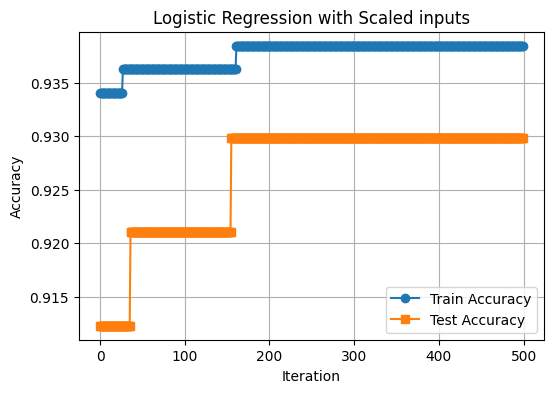

In [181]:
# TODO:
# Using Matplotlib, make a plot with #iterations on the x axis and train and test accuracy on the y_axis
# Recall, we asked you to make simple plots in HW1
eval_every =1
iterations = np.arange(len(train_acc_scaled)) * eval_every
plt.figure(figsize=(6, 4))
plt.plot(iterations, train_acc_scaled, label='Train Accuracy', marker = 'o')
plt.plot(iterations, test_acc_scaled, label='Test Accuracy', marker = 's')

plt.title('Logistic Regression with Scaled inputs')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/1593861677.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1/(1+np.exp(-z))
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/1593861677.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1/(1+np.exp(-z))
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/1593861677.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1/(1+np.exp(-z))
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/1593861677.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1/(1+np.exp(-z))
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/1593861677.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1/(1+np.exp(-z))
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/1593861677.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1/(1+np.exp(-z))
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_48899/15938

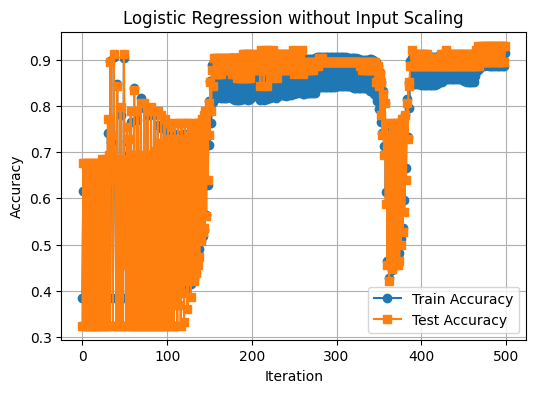

In [182]:
# TODO - re-train and replot logistic regression without doing any input rescaling
# This should mostly be copying code from above but using the unscaled data
learning_rate = 0.001
num_iterations = 500
weights_unscaled, bias_unscaled, train_acc_unscaled, test_acc_unscaled = logistic_regression_with_eval(
    X_train, y_train, X_test, y_test,
    learning_rate, num_iterations, eval_every= eval_every
)
# Final metrics on test set (unscaled)
y_pred_unscaled = predict(X_test, weights_unscaled, bias_unscaled)

# Plot accuracy curves (unscaled)
iterations_unscaled = np.arange(len(train_acc_unscaled)) * eval_every
plt.figure(figsize=(6, 4))
plt.plot(iterations_unscaled, train_acc_unscaled, label='Train Accuracy', marker = 'o')
plt.plot(iterations_unscaled, test_acc_unscaled, label='Test Accuracy', marker = 's')
plt.title('Logistic Regression without Input Scaling')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

What do you notice about the training curves and accuracy?

TODO: ANSWER

Examine the weights for both the scaled and unscaled logistic regression? What do you notice?

In [183]:
# Compare weights

TODO: ANSWER